In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv('data.csv', sep=';')



In [6]:
# disable chained assignments
pd.options.mode.chained_assignment = None 
for i in range(len(df.Longitude)): 
    df.Longitude.loc[i] = df.Longitude.loc[i][0:6] + df.Longitude.loc[i][7:10]
    df.Latitude.loc[i] = df.Latitude.loc[i][0:6] + df.Latitude.loc[i][7:10]

In [7]:
#df = df.set_index('Time')
print (df.dtypes)
df.tail(3)

Date           int64
Time          object
Raw_Time       int64
Latitude      object
Longitude     object
Altitude     float64
Sats           int64
Sat_Speed    float64
Precision    float64
dtype: object


,Date,Time,Raw_Time,Latitude,Longitude,Altitude,Sats,Sat_Speed,Precision
1331,160220,12:42:37,11423700,48.220701,16.375173,167.5,8,4.7411,1.29
1332,160220,12:42:40,11424000,48.220691,16.375173,167.2,9,0.2778,1.29
1333,160220,12:42:43,11424300,48.220686,16.375182,166.6,8,0.3889,1.26


In [8]:
df = df.apply(pd.to_numeric, errors='ignore')
df.dtypes

Date           int64
Time          object
Raw_Time       int64
Latitude     float64
Longitude    float64
Altitude     float64
Sats           int64
Sat_Speed    float64
Precision    float64
dtype: object

In [9]:
df.to_csv('data_formated.csv')
# df.to_csv('data_formated.csv', encoding='utf-8')

In [10]:
import os.path
if os.path.isfile('./map_config.py'):
    print('Config loaded!')
    %run map_config.py

Config loaded!


In [11]:
import keplergl
map_csv=keplergl.KeplerGl(height=400)
map_df=keplergl.KeplerGl(height=400)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [12]:
# DataFrame
map_df.add_data(data=df, name='vienna_df')
map_df.config = config
map_df

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '5n82si', 'type': '…

In [13]:
sats = df.iloc[:,[1,6,8]]
sats.loc[:,['Time']] = pd.to_datetime(sats.Time)
print (round((((sats.Time[len(sats)-1] - sats.Time[0]).total_seconds())/60), 2),'Minutes')

97.32 Minutes


In [14]:
try:
  sats = sats.set_index(['Time'])
except:
  print("Current index is: ", sats.index.name) 

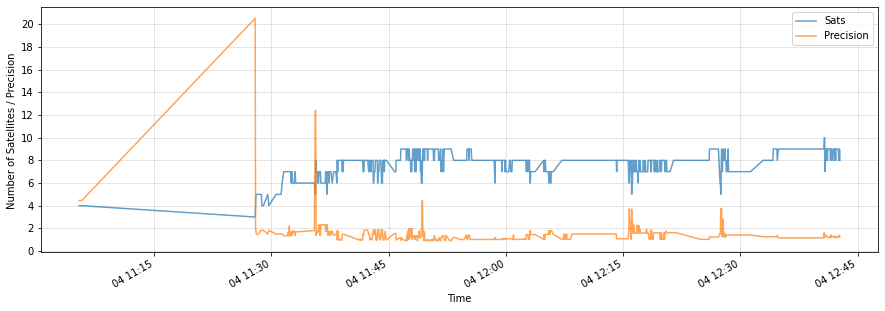

In [15]:
# sats = sats.set_index(['Time']) # enables Time on x-Axis
ax = sats.plot(
    figsize=(15,5),
    subplots=False,
    alpha=0.7)
ax.set_yticks(np.arange(0, 21, 2))
ax.set_yticks(np.arange(0, 21, 2))
ax.grid(np.arange(0, 21, 2), alpha=0.4)
ax.set_ylabel('Number of Satellites / Precision ')

figure = ax.get_figure()    
figure.savefig('time_series.png', dpi=400) 

In [16]:
# e.g. add mapbox://styles/innodesign/ckdasdj991htk1iqoeqs3wjdl 
with open('map_config.py', 'w') as f:
   f.write('config = {}'.format(map_df.config))
# load the config with following magic command 
# %run hex_config.py

In [17]:
# https://docs.kepler.gl/docs/keplergl-jupyter#6-match-config-with-data
config = map_df.config
config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '5n82si',
     'type': 'point',
     'config': {'dataId': 'vienna_df',
      'label': 'Point',
      'color': [255, 203, 153],
      'columns': {'lat': 'Latitude', 'lng': 'Longitude', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.86,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'ColorBrewer RdYlGn-6',
        'type': 'diverging',
        'category': 'ColorBrewer',
        'colors': ['#d73027',
         '#fc8d59',
         '#fee08b',
         '#d9ef8b',
         '#91cf60',
         '#1a9850']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 20],
     

In [18]:
map_df.save_to_html(data={'vienna_df': df}, config=config, file_name='index.html')

Map saved to index.html!
